In [63]:
include("../src/msd.jl")

run_lorentz (generic function with 2 methods)

In [64]:
num_particles = 10000
num_collisions = 1000

@time stats_usual, stats_all = run_lorentz(num_particles, num_collisions)

elapsed time: 38.021193881 seconds (20045880924 bytes allocated, 41.12% gc time)


([(0.0,0.0,0.0,NaN,NaN,10000),(5.0,-0.04038910395857149,2.701452400699818,-0.043306511608142056,1.0774258360176159,10000),(10.0,-0.028388456325308335,6.582945330447398,-0.07593838993535745,2.136020033319868,10000),(15.0,-0.015002587332300662,10.998145909180275,-0.07665733955691445,2.66878036181183,10000),(20.0,0.0020426284574627165,15.554117148836538,-0.07140017989282764,3.139764797785756,10000),(25.0,0.031066342703353452,20.408785219466722,-0.04255695761119527,3.657217248785856,10000),(30.0,0.06653285745845634,25.23412068547196,-0.04357654025712566,4.386794858401268,10000),(35.0,0.07394075055533185,30.14085895038537,-0.06587130387688041,5.1940611902072185,10000),(40.0,0.09156370434270777,34.853354781074934,-0.07786772428308193,5.741928373782946,10000),(45.0,0.0929959249886885,39.57211031480877,-0.1022240643995675,6.3352245128245315,10000)  …  (1700.0,889.1250996737938,NaN,NaN,NaN,1),(1705.0,889.1805703011007,NaN,NaN,NaN,1),(1710.0,891.1359108591685,NaN,NaN,NaN,1),(1715.0,892.198323336

In [3]:
using PyPlot

INFO: Loading help data...


In [75]:
stats2_usual = filter(x->x[6] > num_collisions/2, stats_usual)
stats2_all = filter(x->x[6] > 1000, stats_all)

times = [data[1] for data in stats2_usual];
means =[data[2] for data in stats2_usual]; 
msds = [data[3] for data in stats2_usual];


times2 = [data[1] for data in stats2_all];
means2 = [data[2] for data in stats2_all];
msds2 = [data[3] for data in stats2_all];



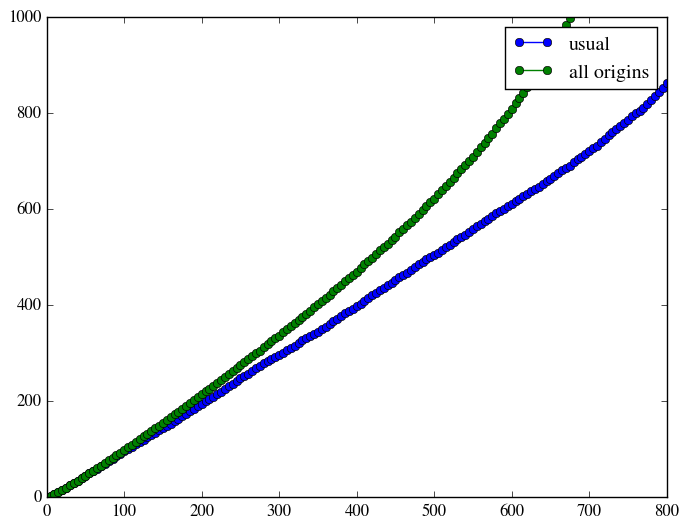

PyObject <matplotlib.legend.Legend object at 0x1199d9e90>

In [76]:
 plot(times, msds, "o-", label="usual")
 plot(times2, msds2, "o-", label="all origins")
#plot(times, means, "o-", label="usual")
#plot(times2, means2, "o-", label="all origins")

xlim(0, 800)
ylim(0, 1000)
#ylim(-1, 1)
legend()

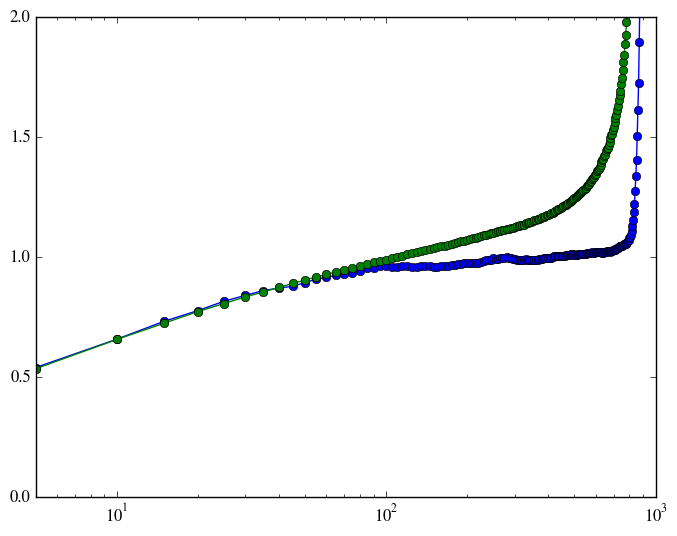

(0,2)

In [79]:
semilogx(times, msds ./ times, "o-")
semilogx(times2, msds2 ./ times2, "o-")
xlim(0, 1000)
ylim(0, 2)

In [116]:
function run_particle(billiard_table, num_collisions)
    x, v = initial_condition(billiard_table, -.5, .5, -.5, .5)
    l = Vector2D(0, 0)
    p = ParticleOnLattice(x, v, l)
        
    xs, ls, free_paths = billiard_dynamics_on_lattice(p, billiard_table, num_collisions)
    positions, times = continuous_time(xs, ls, free_paths, delta_t)
end

function run_particles(billiard_table, num_particles, num_collisions)
    for i in 1:num_particles
        run_particle(billiard_table, num_collisions)
        #gc()
    end
end


run_particles (generic function with 1 method)

In [114]:

gc()
@time run_particle(billiard_table, 1000000)


elapsed time: 3.674504946 seconds (1992654648 bytes allocated, 46.68% gc time)


([Vector2D{Float64}(-0.385964099684619,-0.4339483397361421),Vector2D{Float64}(-1.3534749163722164,0.9223598719220781),Vector2D{Float64}(-2.6585034246282877,3.707211400970422),Vector2D{Float64}(-3.512326750455456,-1.0187893629672),Vector2D{Float64}(-4.372546762428787,-5.53659631503165),Vector2D{Float64}(-2.249596421449907,-4.446637200469559),Vector2D{Float64}(-2.7735205356063504,-3.5724369935788407),Vector2D{Float64}(-5.372964287368319,-4.425007096380261),Vector2D{Float64}(-10.333173851214074,-7.404398974273148),Vector2D{Float64}(-13.539744050958841,-8.217696758262218)  …  Vector2D{Float64}(-1680.4497803957017,-903.4676016108131),Vector2D{Float64}(-1683.356904776948,-904.0113374824958),Vector2D{Float64}(-1679.8419278514543,-904.4236647405563),Vector2D{Float64}(-1677.507344005385,-903.1599301741296),Vector2D{Float64}(-1679.4081531640593,-902.7141195393959),Vector2D{Float64}(-1670.985783717843,-901.4953059789648),Vector2D{Float64}(-1671.574245464399,-898.0888224299193),Vector2D{Float64}(-

In [118]:

gc()
@time run_particles(billiard_table, 10000, 1000)

elapsed time: 40.862335964 seconds (19636428640 bytes allocated, 49.07% gc time)
